Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4827.8760 - mae: 67.6637 - val_loss: 4885.2681 - val_mae: 68.3109
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4639.1523 - mae: 66.3599 - val_loss: 4605.7676 - val_mae: 66.2857
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4262.7075 - mae: 63.5227 - val_loss: 3986.1003 - val_mae: 61.5676
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3528.9321 - mae: 57.4877 - val_loss: 2704.0134 - val_mae: 50.4102
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2156.2737 - mae: 44.2114 - val_loss: 961.2424 - val_mae: 29.3546
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 724.9855 - mae: 23.9772 - val_loss: 236.6688 - val_mae: 12.8213
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 289.3575 - mae: 13.9628 - val_loss: 164.4515 - val_mae: 10.5311
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 218.6850 - mae: 11.9690 - val_loss: 123.5725 - val_mae: 9.1701
Epoch 9/100
25/25 ━

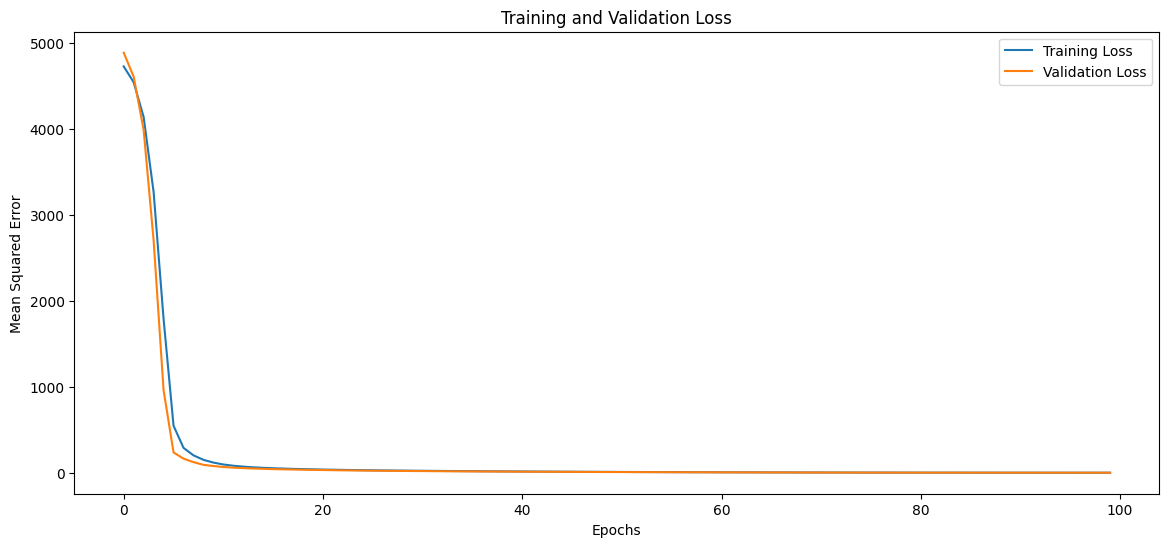

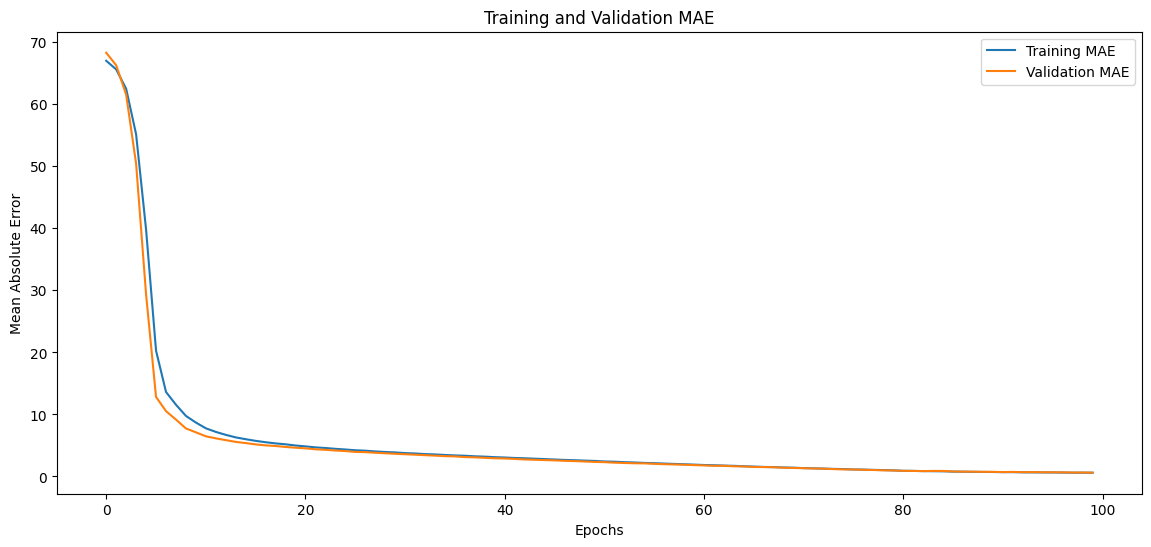

Test Loss (MSE): 0.7705461382865906
Test MAE: 0.6107271313667297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Example predictions: [67.94081  77.812294 40.56371  68.9592   90.225   ]
Actual values: [67 78 39 70 90]


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/student-performance-in-mathematics/exams.csv')  # Adjust path if necessary

# Rename columns for easier access
df.rename(columns={
    'race/ethnicity': 'Race',
    'gender': 'Gender',
    'parental level of education': 'ParentsEducation'
}, inplace=True)

# Clean and preprocess data
df['Race'] = df['Race'].str.replace('group', '')
df['ParentsEducation'] = df['ParentsEducation'].str.replace('some', '').str.strip()

# Feature engineering: create 'Total Score' and 'Status' columns
df['Total Score'] = df['writing score'] + df['reading score'] + df['math score']
df['Status'] = pd.cut(df['Total Score'], bins=[0, 100, 200, 250, float('inf')],
                      labels=['Insufficient', 'Good', 'Very Good', 'Excellent'])

# Encode categorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Race'] = le.fit_transform(df['Race'])
df['ParentsEducation'] = le.fit_transform(df['ParentsEducation'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['Status'] = le.fit_transform(df['Status'])

# Define features and target variable
X = df.drop(columns=['math score', 'Status'])
y = df['math score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the regression model with TensorFlow/Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and store training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(14, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

# Example predictions
predictions = model.predict(X_test[:5])
print("Example predictions:", predictions.flatten())
print("Actual values:", y_test[:5].values)
